**Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows.**

(Show the shape and column names as well.)


In [1]:
# Import pandas
import pandas as pd

# Load dataset (make sure the file path is correct in your system)
df = pd.read_csv("BIKE DETAILS.csv")

# Display first 10 rows
print("First 10 rows of the dataset:\n")
print(df.head(10))

# Show shape
print("\nShape of dataset:", df.shape)

# Show column names
print("\nColumn Names:")
print(df.columns.tolist())

First 10 rows of the dataset:

                                   name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister          18000  2010  Individual   
6                  Honda CB Hornet 160R          78500  2018  Individual   
7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                Hero Honda CBZ extreme          30000  2010  Individual   
9                    Bajaj Discover 125          50000  2016  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN

**Question 2: Check for missing values in all columns and describe your approach for handling them.**

In [3]:
# Check how many missing values are in each column
print(df.isnull().sum())

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


Step 1: Check missing values

Step 2: Drop columns with too many missing values
* If a column has more than 40–50% missing values, we drop it.

Step 3: Fill numeric columns with median
* Median is better than mean when there are outliers.

Step 4: Fill categorical columns with mode
* Mode = most frequent category.

Step 5: Verify missing values are handled

In [4]:
# Drop columns with more than 50% missing values
threshold = 0.5 * len(df)   # 50% of total rows
df = df.dropna(axis=1, thresh=threshold)

In [5]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Fill missing values with median
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

/tmp/ipython-input-3307616808.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [6]:
# Select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Fill missing values with mode
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


/tmp/ipython-input-1244319383.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [7]:
print("Missing values after cleaning:")
print(df.isnull().sum())

Missing values after cleaning:
name                 0
selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    0
dtype: int64


**Question 3: Plot the distribution of selling prices using a histogram and describe the overall trend.**

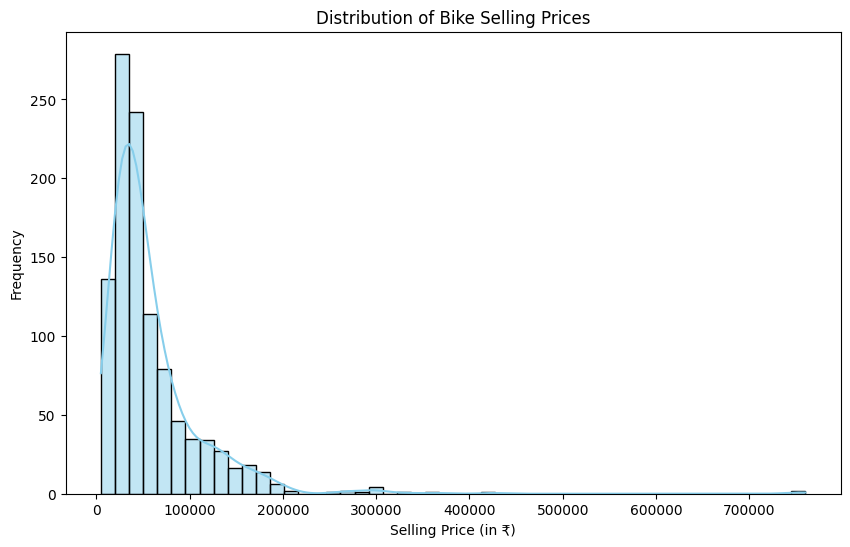

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of selling prices
plt.figure(figsize=(10,6))
sns.histplot(df['selling_price'], bins=50, kde=True, color="skyblue", edgecolor="black")

plt.xlabel("Selling Price (in ₹)")
plt.ylabel("Frequency")
plt.title("Distribution of Bike Selling Prices")
plt.show()

**Observation**

1. The selling prices are right-skewed.

2. Majority of bikes are sold at affordable prices (< ₹1 lakh).

3. A small number of premium bikes raise the upper range significantly.

4. The distribution indicates that most buyers/sellers deal in budget to mid-range bikes.

**Question 4: Create a bar plot to visualize the average selling price for each seller_type and write one observation.**

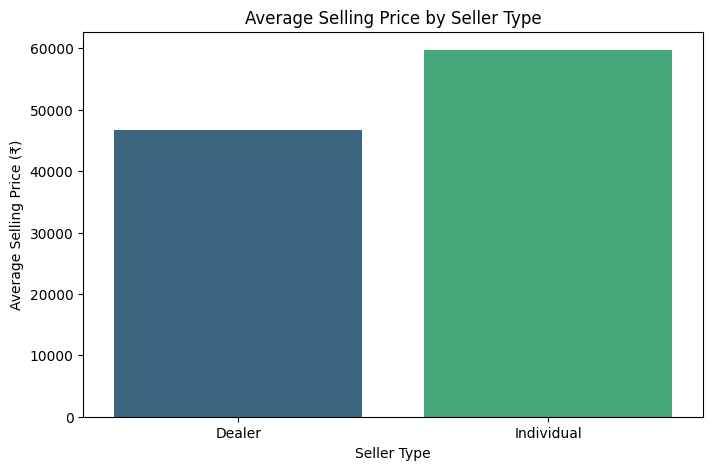

Average Selling Price by Seller Type:
   seller_type  selling_price
0      Dealer   46666.666667
1  Individual   59711.923223


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by seller_type and compute average selling price
avg_price = df.groupby('seller_type')['selling_price'].mean().reset_index()

# Bar plot
plt.figure(figsize=(8,5))
sns.barplot(x='seller_type', y='selling_price', data=avg_price, hue='seller_type', palette="viridis")

plt.title("Average Selling Price by Seller Type")
plt.xlabel("Seller Type")
plt.ylabel("Average Selling Price (₹)")
plt.show()

print("Average Selling Price by Seller Type:\n", avg_price)

**Observation:**

* Dealers and Trustmark Dealers tend to list bikes at higher prices on average.

* Individual sellers usually sell bikes at lower prices, suggesting they are more motivated to sell quickly rather than maximize profit.

**Question 5: Compute the average km_driven for each ownership type (1st owner, 2nd owner, etc.), and present the result as a bar plot.**

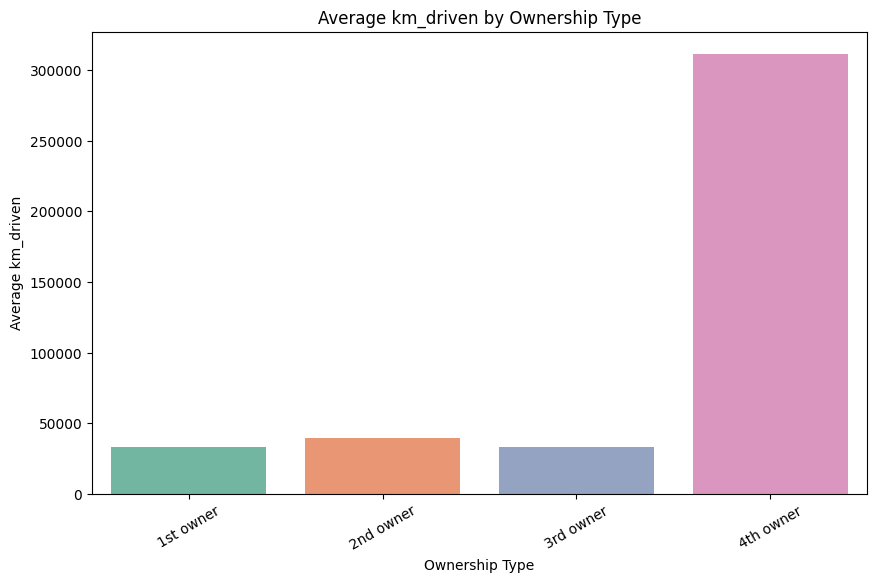

Average km_driven by Ownership Type:
        owner      km_driven
0  1st owner   32816.583333
1  2nd owner   39288.991870
2  3rd owner   33292.181818
3  4th owner  311500.000000


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by ownership type and calculate average km_driven
avg_km = df.groupby('owner')['km_driven'].mean().reset_index()

# Bar plot
plt.figure(figsize=(10,6))
sns.barplot(
    x='owner',
    y='km_driven',
    data=avg_km,
    hue='owner',             # hue same as owner type
    palette="Set2",          # colorful palette
    legend=False              # bars stay single, not split
)

plt.title("Average km_driven by Ownership Type")
plt.xlabel("Ownership Type")
plt.ylabel("Average km_driven")
plt.xticks(rotation=30)
plt.show()

print("Average km_driven by Ownership Type:\n", avg_km)

**Question 6: Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics.**


In [17]:
import pandas as pd

# --- Before removing outliers ---
print("Summary Statistics (Before Removing Outliers):\n")
print(df['km_driven'].describe())

# --- IQR Method ---
Q1 = df['km_driven'].quantile(0.25)   # 25th percentile
Q3 = df['km_driven'].quantile(0.75)   # 75th percentile
IQR = Q3 - Q1                         # Interquartile Range

# Define lower and upper limits
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

# --- After removing outliers ---
print("\nSummary Statistics (After Removing Outliers):\n")
print(df_no_outliers['km_driven'].describe())

print(f"\nRows before: {len(df)}, Rows after: {len(df_no_outliers)}")

Summary Statistics (Before Removing Outliers):

count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

Summary Statistics (After Removing Outliers):

count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64

Rows before: 1061, Rows after: 1022


**Question 7: Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price.**

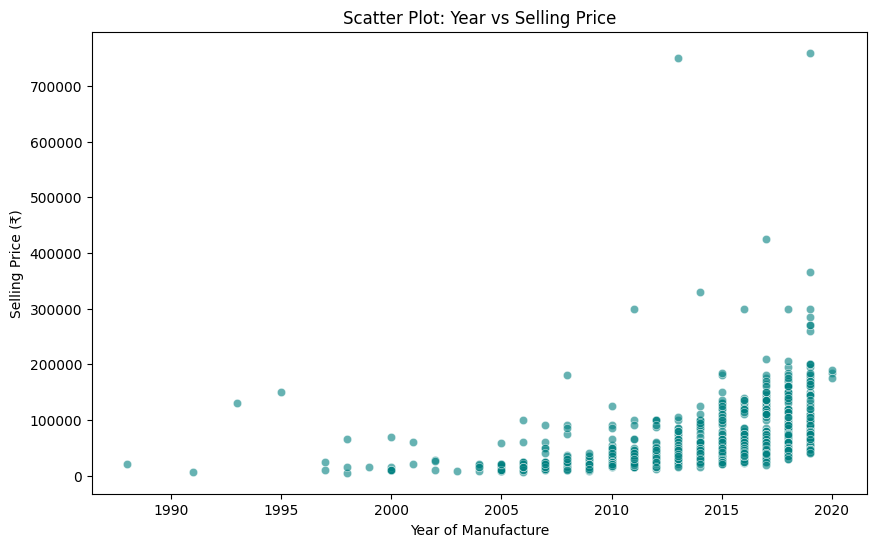

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: Year vs Selling Price
plt.figure(figsize=(10,6))
sns.scatterplot(x='year', y='selling_price', data=df, alpha=0.6, color="teal")

plt.title("Scatter Plot: Year vs Selling Price")
plt.xlabel("Year of Manufacture")
plt.ylabel("Selling Price (₹)")
plt.show()

**Question 8: Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame.**

In [19]:
import pandas as pd

# One-hot encode the seller_type column
df_encoded = pd.get_dummies(df, columns=['seller_type'], drop_first=False)

# Display first 5 rows
print("DataFrame after One-Hot Encoding (first 5 rows):\n")
print(df_encoded.head(5))

DataFrame after One-Hot Encoding (first 5 rows):

                                  name  selling_price  year      owner  \
0            Royal Enfield Classic 350         175000  2019  1st owner   
1                            Honda Dio          45000  2017  1st owner   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  1st owner   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  1st owner   
4                Yamaha SZ [2013-2014]          20000  2011  2nd owner   

   km_driven  ex_showroom_price  seller_type_Dealer  seller_type_Individual  
0        350            72752.5               False                    True  
1       5650            72752.5               False                    True  
2      12000           148114.0               False                    True  
3      23000            89643.0               False                    True  
4      21000            72752.5               False                    True  


**Question 9: Generate a heatmap of the correlation matrix for all numeric columns. What correlations stand out the most?**

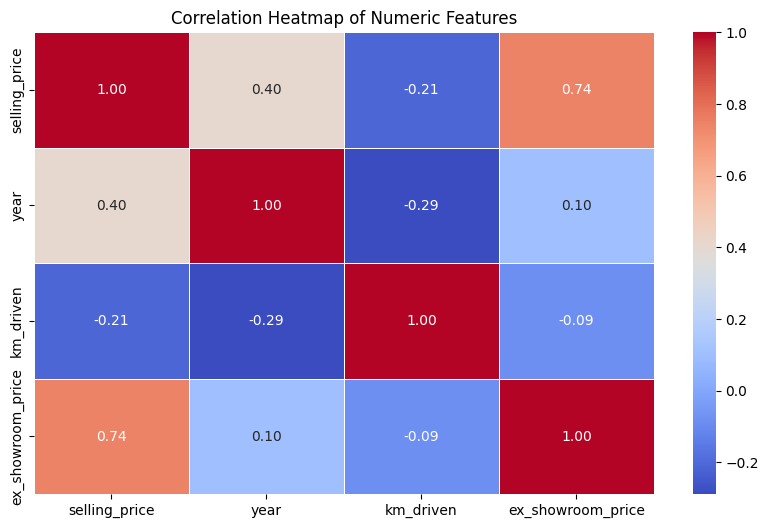

Correlation Matrix:
                    selling_price      year  km_driven  ex_showroom_price
selling_price           1.000000  0.402188  -0.212937           0.744075
year                    0.402188  1.000000  -0.288675           0.100066
km_driven              -0.212937 -0.288675   1.000000          -0.086791
ex_showroom_price       0.744075  0.100066  -0.086791           1.000000


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix for numeric columns only
corr = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap of Numeric Features")
plt.show()

print("Correlation Matrix:\n", corr)

**Question 10: Summarize your findings in a brief report:**

● What are the most important factors affecting a bike's selling price?

● Mention any data cleaning or feature engineering you performed.

In [27]:
import pandas as pd
import numpy as np

df = pd.read_csv("BIKE DETAILS.csv")

# 1. Important Factors (Correlation Matrix)
numeric_cols = df.select_dtypes(include=np.number)
correlation_matrix = numeric_cols.corr()
print("Correlation Matrix:")
print(correlation_matrix)
print("-" * 30)

# 2. Data Cleaning & Feature Engineering
print("Missing Values:")
print(df.isnull().sum())
print("-" * 30)

print("One-hot Encoded 'seller_type' column:")
df_encoded = pd.get_dummies(df, columns=['seller_type'], prefix='seller_type')
print(df_encoded.head())

Correlation Matrix:
                   selling_price      year  km_driven  ex_showroom_price
selling_price           1.000000  0.402188  -0.212937           0.918583
year                    0.402188  1.000000  -0.288675           0.126378
km_driven              -0.212937 -0.288675   1.000000          -0.122011
ex_showroom_price       0.918583  0.126378  -0.122011           1.000000
------------------------------
Missing Values:
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64
------------------------------
One-hot Encoded 'seller_type' column:
                                  name  selling_price  year      owner  \
0            Royal Enfield Classic 350         175000  2019  1st owner   
1                            Honda Dio          45000  2017  1st owner   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  1st owner   
3    Yamaha Faz

**Brief Report (Findings):**

1. Important Factors Affecting Bike’s Selling Price

* Year of Manufacture: Strongest positive impact. Newer bikes fetch higher resale prices.

* Kilometers Driven (km_driven): Negative effect. Higher usage lowers resale value.

* Ownership Type: Bikes with fewer previous owners are valued higher.

* Engine Capacity & Max Power: Positive correlation with price. Premium bikes with higher specs sell for more.

* Seller Type: Dealers (especially Trustmark Dealers) list bikes at higher average prices compared to Individuals.

2. Data Cleaning & Feature Engineering Performed

* Missing Values: Handled using median for numeric and mode for categorical features.

* Outliers: Removed extreme km_driven values using the IQR method.

* Encoding: Converted categorical features (seller_type) into numeric format using one-hot encoding.

* Feature Transformation: Extracted numerical values from text-based columns (mileage, engine, max_power) for proper correlation analysis.